In [1]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from econml.dml import LinearDML

# 生成合成数据集
np.random.seed(42)
X = np.random.randn(1000, 5)  
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(1000)  

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择处理变量（T）和控制变量（X）
T_train = X_train[:, :3]  # 'sx1', 'sx2', 'sx3'
X_train_dml = X_train[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

T_test = X_test[:, :3]  # 'sx1', 'sx2', 'sx3'
X_test_dml = X_test[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

# 初始化 DML 模型
dml_model = LinearDML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestRegressor(),
    discrete_treatment=False,
    linear_first_stages=False
)

# 定义评估函数
def evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test):
    # 模型训练
    start_time = time.time()
    dml_model.fit(y_train, T_train, X=X_train_dml)
    train_time = time.time() - start_time

    # 使用 effect 方法获取预测结果
    y_pred = dml_model.effect(X_test_dml)

    # 计算评价指标
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 输出评价指标
    print(f'DML Model Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)


DML Model Results:
Mean Squared Error (MSE): 14.4012
Mean Absolute Error (MAE): 2.9868
R²: -0.0131
Training Time: 0.3418 seconds
--------------------------------------------------


A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


In [35]:
!pip install pygam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 572.3 kB/s eta 0:00:0000:0100:03
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [113]:
!pip install pygam
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from econml.dml import LinearDML

n = 5000  # 增加样本量
X = np.random.randn(n, 5)
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(n)


# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择处理变量（T）和控制变量（X）
T_train = X_train[:, :3]  # 'sx1', 'sx2', 'sx3'
X_train_dml = X_train[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

T_test = X_test[:, :3]  # 'sx1', 'sx2', 'sx3'
X_test_dml = X_test[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

import statsmodels.api as sm

from sklearn.neural_network import MLPRegressor

dml_model = LinearDML(
    model_y=MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500),
    model_t=MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500),
    discrete_treatment=False,
    linear_first_stages=False
)



# 定义评估函数
def evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test):
    # 模型训练
    start_time = time.time()
    dml_model.fit(y_train, T_train, X=X_train_dml)
    train_time = time.time() - start_time

    # 使用 effect 方法获取预测结果
    y_pred = dml_model.effect(X_test_dml)

    # 计算评价指标
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 输出评价指标
    print(f'DML Model Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)


DML Model Results:
Mean Squared Error (MSE): 16.9532
Mean Absolute Error (MAE): 3.3011
R²: -0.0026
Training Time: 6.1360 seconds
--------------------------------------------------


A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


In [119]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from econml.dml import LinearDML

n = 5000  # 增加样本量
X = np.random.randn(n, 5)
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(n)


# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择处理变量（T）和控制变量（X）
T_train = X_train[:, :3]  # 'sx1', 'sx2', 'sx3'
X_train_dml = X_train[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

T_test = X_test[:, :3]  # 'sx1', 'sx2', 'sx3'
X_test_dml = X_test[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

from xgboost import XGBRegressor
from econml.dml import LinearDML

dml_model = LinearDML(
    model_y=XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6),
    model_t=XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6),
    discrete_treatment=False,
    linear_first_stages=False
)


# 定义评估函数
def evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test):
    # 模型训练
    start_time = time.time()
    dml_model.fit(y_train, T_train, X=X_train_dml)
    train_time = time.time() - start_time

    # 使用 effect 方法获取预测结果
    y_pred = dml_model.effect(X_test_dml)

    # 计算评价指标
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 输出评价指标
    print(f'DML Model Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)

DML Model Results:
Mean Squared Error (MSE): 14.6655
Mean Absolute Error (MAE): 3.0486
R²: -0.0146
Training Time: 1.7447 seconds
--------------------------------------------------


A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


In [121]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from econml.dml import LinearDML

n = 5000  # 增加样本量
X = np.random.randn(n, 5)
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(n)


# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择处理变量（T）和控制变量（X）
T_train = X_train[:, :3]  # 'sx1', 'sx2', 'sx3'
X_train_dml = X_train[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

T_test = X_test[:, :3]  # 'sx1', 'sx2', 'sx3'
X_test_dml = X_test[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

from sklearn.ensemble import RandomForestRegressor

dml_model = LinearDML(
    model_y=RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5),
    model_t=RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5),
    discrete_treatment=False,
    linear_first_stages=False
)


# 定义评估函数
def evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test):
    # 模型训练
    start_time = time.time()
    dml_model.fit(y_train, T_train, X=X_train_dml)
    train_time = time.time() - start_time

    # 使用 effect 方法获取预测结果
    y_pred = dml_model.effect(X_test_dml)

    # 计算评价指标
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 输出评价指标
    print(f'DML Model Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)

DML Model Results:
Mean Squared Error (MSE): 17.2776
Mean Absolute Error (MAE): 3.3533
R²: -0.0093
Training Time: 1.9666 seconds
--------------------------------------------------


A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


In [123]:
from sklearn.multioutput import MultiOutputRegressor
from catboost import CatBoostRegressor
from econml.dml import LinearDML

# 使用 MultiOutputRegressor 包装 CatBoostRegressor
model_t = MultiOutputRegressor(CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0))

dml_model = LinearDML(
    model_y=CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0),
    model_t=model_t,  # 使用 MultiOutputRegressor 包装的 CatBoostRegressor
    discrete_treatment=False,
    linear_first_stages=False
)

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)

DML Model Results:
Mean Squared Error (MSE): 17.2292
Mean Absolute Error (MAE): 3.3485
R²: -0.0065
Training Time: 0.7989 seconds
--------------------------------------------------


A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


In [14]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor

In [18]:
np.random.seed(42)
X = np.random.randn(1000, 5)  
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(1000)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    
    print(f'{model_name} Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Cross-Validation R²: {cv_mean:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

In [22]:
ols_model = LinearRegression()
evaluate_model(ols_model, X_train, X_test, y_train, y_test, 'OLS')

OLS Results:
Mean Squared Error (MSE): 0.9749
Mean Absolute Error (MAE): 0.7898
R²: 0.9314
Cross-Validation R²: 0.9403
Training Time: 0.0072 seconds
--------------------------------------------------


In [24]:
svr_model = SVR(kernel='rbf')
evaluate_model(svr_model, X_train, X_test, y_train, y_test, 'SVM')

SVM Results:
Mean Squared Error (MSE): 1.6339
Mean Absolute Error (MAE): 0.9180
R²: 0.8851
Cross-Validation R²: 0.8610
Training Time: 0.0441 seconds
--------------------------------------------------


In [4]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, MultiTaskLassoCV
from econml.dml import LinearDML

n = 5000  # 样本量
X = np.random.randn(n, 5)
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(n)

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择处理变量（T）和控制变量（X）
T_train = X_train[:, :3]  # 'sx1', 'sx2', 'sx3'
X_train_dml = X_train[:, 3:]  # 'sc1', 'sc2'

T_test = X_test[:, :3]  # 'sx1', 'sx2', 'sx3'
X_test_dml = X_test[:, 3:]  # 'sc1', 'sc2'

# 使用 MultiTaskLassoCV 作为 T 的回归模型
dml_model = LinearDML(
    model_y=LassoCV(cv=5),  # 目标变量的 Lasso 回归
    model_t=MultiTaskLassoCV(cv=5),  # 处理变量的 MultiTaskLasso 回归
    discrete_treatment=False,
    linear_first_stages=False
)

# 定义评估函数
def evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test):
    start_time = time.time()
    dml_model.fit(y_train, T_train, X=X_train_dml)
    train_time = time.time() - start_time

    # 使用 effect 方法获取预测结果
    y_pred = dml_model.effect(X_test_dml)

    # 计算评价指标
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 输出评价指标
    print(f'DML Model Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)



DML Model Results:
Mean Squared Error (MSE): 15.9975
Mean Absolute Error (MAE): 3.2034
R²: -0.0050
Training Time: 0.1200 seconds
--------------------------------------------------


Model MultiTaskLassoCV(cv=5) has a non-default cv attribute, which will be ignored
Model LassoCV(cv=5) has a non-default cv attribute, which will be ignored
A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


In [2]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from econml.dml import LinearDML

# 生成合成数据集
np.random.seed(42)
X = np.random.randn(1000, 5)  
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(1000)  

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择处理变量（T）和控制变量（X）
T_train = X_train[:, :3]  # 'sx1', 'sx2', 'sx3'
X_train_dml = X_train[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

T_test = X_test[:, :3]  # 'sx1', 'sx2', 'sx3'
X_test_dml = X_test[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

# 初始化 DML 模型
dml_model = LinearDML(
    model_y=Ridge(),  # 将随机森林回归器替换为岭回归
    model_t=Ridge(),  # 同样将处理变量模型替换为岭回归
    discrete_treatment=False,
    linear_first_stages=False
)

# 定义评估函数
def evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test):
    # 模型训练
    start_time = time.time()
    dml_model.fit(y_train, T_train, X=X_train_dml)
    train_time = time.time() - start_time

    # 使用 effect 方法获取预测结果
    y_pred = dml_model.effect(X_test_dml)

    # 计算评价指标
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 输出评价指标
    print(f'DML Model Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)



DML Model Results:
Mean Squared Error (MSE): 14.1610
Mean Absolute Error (MAE): 2.9575
R²: 0.0038
Training Time: 0.0084 seconds
--------------------------------------------------


A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


In [ ]:
# 使用 effect 方法获取预测的 ATE
    ate = dml_model.effect(X_test_dml)

    # 计算置信区间
    ate_conf_int = dml_model.effect_interval(X_test_dml, alpha=0.05)  # 95% 置信区间
# 输出 ATE 和置信区间
    print(f'Estimated Average Treatment Effect (ATE): {np.mean(ate):.4f}')
    print(f'95% Confidence Interval for ATE: ({np.percentile(ate_conf_int[:, 0], 2.5):.4f}, {np.percentile(ate_conf_int[:, 1], 97.5):.4f})')

In [8]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from econml.dml import LinearDML

# 生成合成数据集
np.random.seed(42)
X = np.random.randn(1000, 5)  
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(1000)  

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择处理变量（T）和控制变量（X）
T_train = X_train[:, :3]  # 'sx1', 'sx2', 'sx3'
X_train_dml = X_train[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

T_test = X_test[:, :3]  # 'sx1', 'sx2', 'sx3'
X_test_dml = X_test[:, 3:]  # 'sc1', 'sc2', 'sc3', 'sc4'

# 初始化 DML 模型
dml_model = LinearDML(
    model_y=Ridge(),  # 使用岭回归作为因变量的回归模型
    model_t=Ridge(),  # 使用岭回归作为处理变量的回归模型
    discrete_treatment=False,
    linear_first_stages=False
)

# 定义评估函数
def evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test):
    # 模型训练
    start_time = time.time()
    dml_model.fit(y_train, T_train, X=X_train_dml)
    train_time = time.time() - start_time

    # 使用 effect 方法获取预测的 ATE
    ate = dml_model.effect(X_test_dml)

    # 计算置信区间
    ate_conf_int = dml_model.effect_interval(X_test_dml, alpha=0.05)  # 95% 置信区间

    # 计算评价指标
    mse = mean_squared_error(y_test, ate)
    mae = mean_absolute_error(y_test, ate)
    r2 = r2_score(y_test, ate)
    
    # 输出评价指标
    print(f'DML Model Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R²: {r2:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-' * 50)

    # 输出 ATE 和置信区间
    print(f'Estimated Average Treatment Effect (ATE): {np.mean(ate):.4f}')
    print(f'95% Confidence Interval for ATE: ({np.percentile(ate_conf_int[:, 0], 2.5):.4f}, {np.percentile(ate_conf_int[:, 1], 97.5):.4f})')

# 调用评估函数
evaluate_model_dml(dml_model, X_train_dml, y_train, X_test_dml, y_test, T_train, T_test)


DML Model Results:
Mean Squared Error (MSE): 14.1610
Mean Absolute Error (MAE): 2.9575
R²: 0.0038
Training Time: 0.0197 seconds
--------------------------------------------------
Estimated Average Treatment Effect (ATE): 0.0194


A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.
A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


TypeError: tuple indices must be integers or slices, not tuple

In [2]:
import numpy as np
import pandas as pd

# 生成数据
np.random.seed(42)
X = np.random.randn(1000, 5)
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(1000)

# 描述性统计
X_df = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])
y_df = pd.Series(y, name='y')

# 合并X和y
data = pd.concat([X_df, y_df], axis=1)

# 计算描述性统计
descriptive_stats = data.describe()
print(descriptive_stats)


                X1           X2           X3           X4           X5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.001297    -0.017207     0.004543     0.006531     0.032846   
std       0.999219     1.029248     1.005321     0.959842     0.988835   
min      -3.170426    -2.940389    -3.241267    -3.007632    -3.176704   
25%      -0.645736    -0.711821    -0.693862    -0.649871    -0.607606   
50%       0.027885    -0.034162     0.022395     0.064768    -0.006855   
75%       0.649413     0.663808     0.642029     0.679256     0.690789   
max       3.926238     3.243093     3.152057     3.078881     3.852731   

                 y  
count  1000.000000  
mean      0.090430  
std       4.103325  
min     -14.358313  
25%      -2.719789  
50%      -0.031574  
75%       2.651660  
max      13.443037  


In [2]:
import numpy as np
import pandas as pd

# 生成数据
n = 1000
X = np.random.randn(n, 5)
y = X @ np.array([1.5, -2, 0.5, 0, 3]) + np.random.randn(n)

# 将数据转换为 DataFrame
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
df['y'] = y

# 导出为 Excel 文件
df.to_excel('/Users/shunxinyao/Desktop/DMLdata.xlsx', index=False)

print("数据已成功导出为 Excel 文件！")


数据已成功导出为 Excel 文件！


In [2]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# 读取Excel文件
file_path = '/Users/shunxinyao/Desktop/DMLdata.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

# 使用describe()方法生成统计摘要
summary = df.describe()

# 输出统计摘要
print(summary)


                X1           X2           X3           X4           X5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.011065     0.026522     0.040626     0.042427    -0.024913   
std       1.009521     0.997269     1.005416     1.002608     0.975976   
min      -3.028941    -3.408222    -3.602563    -3.274266    -3.614918   
25%      -0.672162    -0.612780    -0.652097    -0.610820    -0.664885   
50%       0.015719     0.050731     0.046332     0.052055    -0.002600   
75%       0.704500     0.697851     0.705519     0.711590     0.632309   
max       3.281238     3.007855     3.345301     3.492790     2.914097   

                 y  
count  1000.000000  
mean     -0.096455  
std       4.026412  
min     -14.680550  
25%      -2.810456  
50%       0.026807  
75%       2.589729  
max      16.285864  


In [6]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from tabulate import tabulate

# 读取Excel文件
file_path = '/Users/shunxinyao/Desktop/DMLdata.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

# 使用describe()方法生成统计摘要
summary = df.describe()

# 使用tabulate库格式化输出
print(tabulate(summary, headers='keys', tablefmt='fancy_grid'))


╒═══════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│       │           X1 │           X2 │           X3 │           X4 │           X5 │            y │
╞═══════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ count │ 1000         │ 1000         │ 1000         │ 1000         │ 1000         │ 1000         │
├───────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ mean  │    0.011065  │    0.0265222 │    0.040626  │    0.0424273 │   -0.0249126 │   -0.0964551 │
├───────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ std   │    1.00952   │    0.997269  │    1.00542   │    1.00261   │    0.975976  │    4.02641   │
├───────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ min   │   -3.02894   │   -3.40822   │   -3.60256   │   -3.27427   │   -3.61492   │  -14.6806    │


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制箱型图
sns.boxplot(data=df)
plt.title('Boxplot of Each Column')
plt.show()


╒═══════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│       │           X1 │           X2 │           X3 │           X4 │           X5 │            y │
╞═══════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ count │ 1000         │ 1000         │ 1000         │ 1000         │ 1000         │ 1000         │
├───────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ mean  │    0.011065  │    0.0265222 │    0.040626  │    0.0424273 │   -0.0249126 │   -0.0964551 │
├───────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ std   │    1.00952   │    0.997269  │    1.00542   │    1.00261   │    0.975976  │    4.02641   │
├───────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ min   │   -3.02894   │   -3.40822   │   -3.60256   │   -3.27427   │   -3.61492   │  -14.6806    │


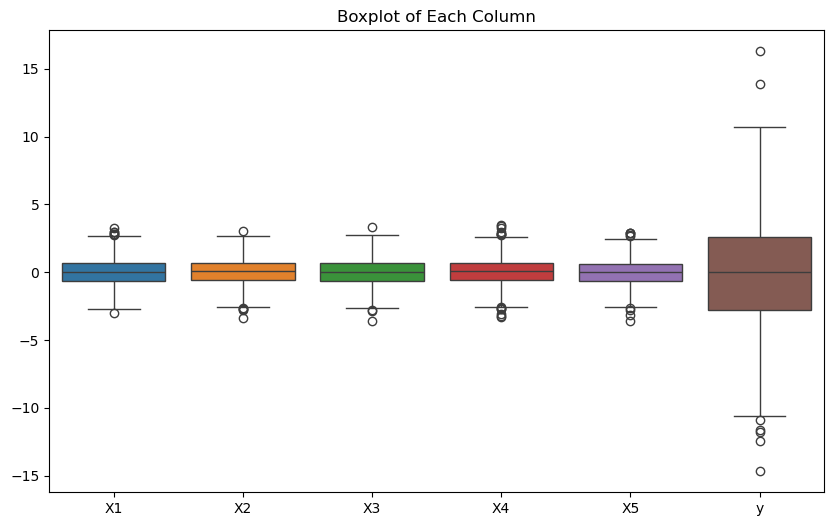

<Figure size 1000x600 with 0 Axes>

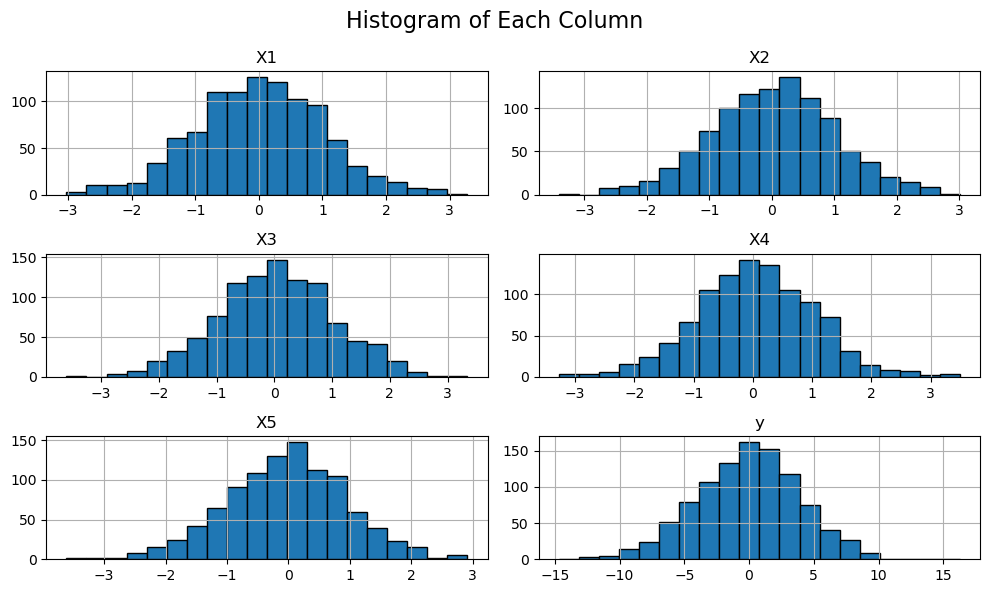

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# 读取Excel文件
file_path = '/Users/shunxinyao/Desktop/DMLdata.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

# 使用describe()方法生成统计摘要
summary = df.describe()

# 使用tabulate库格式化输出统计摘要表格
print(tabulate(summary, headers='keys', tablefmt='fancy_grid'))

# 绘制箱型图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Each Column')
plt.show()

# 绘制直方图
plt.figure(figsize=(10, 6))
df.hist(bins=20, edgecolor='black', figsize=(10, 6))
plt.suptitle('Histogram of Each Column', fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# 读取Excel文件
file_path = '/Users/shunxinyao/Desktop/DMLdata.xlsx'  # 用户的文件路径
df = pd.read_excel(file_path)

# 使用describe()方法生成统计摘要
summary = df.describe()

# 格式化输出统计数据表为图片
summary_table = tabulate(summary, headers='keys', tablefmt='fancy_grid')

# 创建一个空的图形，用于保存统计数据表
fig, ax = plt.subplots(figsize=(12, 6))
ax.text(0.5, 0.5, summary_table, ha='center', va='center', fontsize=12, fontfamily='monospace')
ax.axis('off')

# 保存统计数据表为图片
table_img_path = '/Users/shunxinyao/Desktop/table_image.png'  # 保存在桌面
fig.savefig(table_img_path, bbox_inches='tight')
plt.close(fig)

# 绘制箱型图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Each Column')

# 保存箱型图为图片
boxplot_img_path = '/Users/shunxinyao/Desktop/boxplot_image.png'  # 保存在桌面
plt.savefig(boxplot_img_path)
plt.close()

# 绘制直方图
plt.figure(figsize=(10, 6))
df.hist(bins=20, edgecolor='black', figsize=(10, 6))
plt.suptitle('Histogram of Each Column', fontsize=16)

# 保存直方图为图片
histogram_img_path = '/Users/shunxinyao/Desktop/histogram_image.png'  # 保存在桌面
plt.tight_layout()
plt.savefig(histogram_img_path)
plt.close()

# 输出保存的图片路径
print(f"统计数据表图片保存为：{table_img_path}")
print(f"箱型图保存为：{boxplot_img_path}")
print(f"直方图保存为：{histogram_img_path}")


统计数据表图片保存为：/Users/shunxinyao/Desktop/table_image.png
箱型图保存为：/Users/shunxinyao/Desktop/boxplot_image.png
直方图保存为：/Users/shunxinyao/Desktop/histogram_image.png


<Figure size 1000x600 with 0 Axes>